In [1]:
%matplotlib notebook

In [2]:
import requests
import json
import gmaps
import matplotlib as plt
from config import (gkey)
from pprint import pprint
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt

In [3]:
zip_crime_csv = "Resources/police_data.csv"
zip_crime_reader = pd.read_csv(zip_crime_csv, encoding="ISO-8859-1")
zip_crime_reader.head(2)

,Incident Number w/year,Year of Incident,Watch,Call (911) Problem,Type of Incident,Date1 of Occurrence,Month1 of Occurence,Day1 of the Week,Time1 of Occurrence,Call Dispatch Date Time,X Coordinate,Y Cordinate,Zip Code,City,State
0,038164-2018,2018,3,6XEA - DISTURBANCE EMERG AMB,RESIST ARREST SEARCH OR TRANSPORT,2/21/2018,February,Wed,19:30,2/21/2018 19:41,NaN,NaN,NaN,NaN,NaN
1,066284-2018,2018,1,6X - MAJOR DIST (VIOLENCE),ASSAULT -PUB SERV (PEACE OFFICER/JUDGE),3/30/2018,March,Fri,01:40,3/30/2018 01:27,NaN,NaN,NaN,NaN,NaN


In [4]:
zip_crime_reader.count()

Incident Number w/year     133949
Year of Incident           133949
Watch                      133949
Call (911) Problem         132683
Type of Incident           133949
Date1 of Occurrence        133949
Month1 of Occurence        133949
Day1 of the Week           133949
Time1 of Occurrence        133949
Call Dispatch Date Time    132673
X Coordinate                98503
Y Cordinate                 98503
Zip Code                   133669
City                       132123
State                      132974
dtype: int64

In [5]:
zip_crime_dropped = zip_crime_reader.dropna(how='any')
zip_crime_dropped.count()

Incident Number w/year     95440
Year of Incident           95440
Watch                      95440
Call (911) Problem         95440
Type of Incident           95440
Date1 of Occurrence        95440
Month1 of Occurence        95440
Day1 of the Week           95440
Time1 of Occurrence        95440
Call Dispatch Date Time    95440
X Coordinate               95440
Y Cordinate                95440
Zip Code                   95440
City                       95440
State                      95440
dtype: int64

In [6]:
zip_crime_dropped.columns

Index(['Incident Number w/year', 'Year of Incident', 'Watch',
       'Call (911) Problem', 'Type of Incident', 'Date1 of Occurrence',
       'Month1 of Occurence', 'Day1 of the Week', 'Time1 of Occurrence',
       'Call Dispatch Date Time', 'X Coordinate', 'Y Cordinate', 'Zip Code',
       'City', 'State'],
      dtype='object')

In [7]:
zip_crime_dropped.dtypes

Incident Number w/year      object
Year of Incident             int64
Watch                        int64
Call (911) Problem          object
Type of Incident            object
Date1 of Occurrence         object
Month1 of Occurence         object
Day1 of the Week            object
Time1 of Occurrence         object
Call Dispatch Date Time     object
X Coordinate               float64
Y Cordinate                float64
Zip Code                   float64
City                        object
State                       object
dtype: object

In [8]:
zip_crime_dropped['Zip Code'] = zip_crime_dropped['Zip Code'].astype(object)
zip_crime_dropped['Zip Code'].dtype
zip_crime_dropped.dtypes

C:\Users\btech\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Incident Number w/year      object
Year of Incident             int64
Watch                        int64
Call (911) Problem          object
Type of Incident            object
Date1 of Occurrence         object
Month1 of Occurence         object
Day1 of the Week            object
Time1 of Occurrence         object
Call Dispatch Date Time     object
X Coordinate               float64
Y Cordinate                float64
Zip Code                    object
City                        object
State                       object
dtype: object

In [9]:
zip_crime_df = zip_crime_dropped.loc[:, ["Zip Code", "X Coordinate", "Y Cordinate", "City", "Type of Incident"]]
zip_crime_renamed_df = zip_crime_df.rename(columns={"Zip Code": "Zip Code","X Coordinate": "Longitude", "Y Cordinate": "Latitude", "City": "City","Type of Incident":"Type of Crime"})
zip_crime_renamed_df.head(10)

,Zip Code,Longitude,Latitude,City,Type of Crime
205,75212,2476498.585,6971715.153,DALLAS,VIO PROTECT ORDER BIAS/PREJUDICE
212,75253,2548241.858,6932130.126,DALLAS,ABANDONED PROPERTY (NO OFFENSE)
219,75217,2525365.155,6960102.895,DALLAS,PUBLIC INTOXICATION
221,75216,2496126.907,6941940.628,DALLAS,ASSAULT -BODILY INJURY ONLY
222,75216,2487800.730,6937829.316,DALLAS,WARRANT-DALLAS PD (ALIAS/CAPIAS)
229,75211,2468877.713,6961189.651,DALLAS,UNAUTHORIZED USE OF MOTOR VEH - (ATT) TRUCK OR...
230,75204,2494114.098,6976578.343,DALLAS,"CRIM MISCHIEF >OR EQUAL $750 < $2,500"
231,75215,2492637.330,6968271.897,DALLAS,PUBLIC INTOXICATION
233,75217,2524662.487,6947002.514,DALLAS,FAIL TO ID -FUGITIVE FROM JUSTICE
234,75210,2510456.676,6966237.837,DALLAS,DWI 1 PREV CONV


In [10]:
unique_crimes = len(zip_crime_renamed_df["Type of Crime"].unique())
unique_zip = len(zip_crime_renamed_df["Zip Code"].unique())
unique_zipcrimes = pd.DataFrame({"Number of Unique ZipCodes": [unique_zip] , "Number of Unique Crimes": [unique_crimes] })
unique_zipcrimes

,Number of Unique ZipCodes,Number of Unique Crimes
0,81,549


In [11]:
#warnings.simplefilter(action='ignore', category=FutureWarning)
#print('x' in np.arange(5))   #returns False, without Warning

zip_city = zip_crime_renamed_df["City"].value_counts()
zip_city
#zip_crime_loc = zip_crime_renamed_df.loc[zip_crime_renamed_df["City"] == "Garland"]
#zip_crime_loc


#zip_crime_loc = zip_crime_renamed_df.loc[(zip_crime_renamed_df["Zip Code"] == "PUBLIC INTOXICATION") | (zip_crime_renamed_df["Zip Code"] == "ASSAULT -BODILY INJURY ONLY"),:]
#print(zip_crime_loc)

DALLAS             94902
Dallas               227
GARLAND               46
DAL                   32
MESQUITE              30
DUNCANVILLE           26
RICHARDSON            26
DESOTO                21
DALLLAS               19
CARROLLTON            18
ROWLETT               17
DLS                   12
IRVING                 8
LANCASTER              7
DALAS                  7
COPPELL                6
DALLS                  4
PLANO                  4
GRAND PRAIRIE          4
UNIVERSITY PARK        3
ADDISON                3
SEAGOVILLE             3
CEDAR HILL             3
GRAND PRAI             3
RED OAK                1
DUNCANVILL             1
DALALAS                1
DALALS                 1
DA                     1
ALICE                  1
FARMERSBRA             1
DALLASS                1
DALLAS TX              1
Name: City, dtype: int64

In [12]:
zip_crime_changed_df = zip_crime_renamed_df.replace({"Dallas": "DALLAS","DAL": "DALLAS", "DALLLAS": "DALLAS","DALLLAS": "DALLAS","DLS": "DALLAS","DALAS": "DALLAS","DALLS": "DALLAS","DALLAS TX": "DALLAS","DALALS": "DALLAS","DA": "DALLAS","DALLASS": "DALLAS","DALALAS": "DALLAS", "GRAND PRAI": "GRAND PRAIRIE"})
zip_crime_changed_df["City"].value_counts()

DALLAS             95208
GARLAND               46
MESQUITE              30
RICHARDSON            26
DUNCANVILLE           26
DESOTO                21
CARROLLTON            18
ROWLETT               17
IRVING                 8
LANCASTER              7
GRAND PRAIRIE          7
COPPELL                6
PLANO                  4
UNIVERSITY PARK        3
ADDISON                3
SEAGOVILLE             3
CEDAR HILL             3
DUNCANVILL             1
RED OAK                1
ALICE                  1
FARMERSBRA             1
Name: City, dtype: int64

In [13]:
dallas_crime_df = zip_crime_changed_df.loc[zip_crime_changed_df["City"] == "DALLAS"]
rowlett_crime_df = zip_crime_changed_df.loc[zip_crime_changed_df["City"] == "ROWLETT"]
plano_crime_df = zip_crime_changed_df.loc[zip_crime_changed_df["City"] == "PLANO"]
carrollton_crime_df = zip_crime_changed_df.loc[zip_crime_changed_df["City"] == "CARROLLTON"]

# or just len() for total crimes
#unique_crimes_dallas = len(dallas_crime_df["Type of Crime"].unique())             
unique_crimes_dallas = dallas_crime_df["Type of Crime"]
unique_crimes_rowlett = len(rowlett_crime_df["Type of Crime"].unique())
#unique_crimes_plano = len(plano_crime_df["Type of Crime"].unique())
unique_crimes_plano = plano_crime_df["Type of Crime"]
unique_crimes_carrollton = len(carrollton_crime_df["Type of Crime"].unique())


unique_city_crimes = pd.DataFrame({"Total Unique Dallas Crimes": [unique_crimes_dallas], "Total Unique Plano Crimes":[unique_crimes_plano] })
unique_city_crimes.head(20)

#Need to do this for different Dallas Zip Code locations
#Create DataFrame with header City or Zip/Total Crimes in 2018/percent within the entire metroplex of citys or Zipcodes in Dallas
#Bar / Line / Heat?
#Transpose Zips?

,Total Unique Dallas Crimes,Total Unique Plano Crimes
0,205 VIO PROTECT ORDER B...,25841 UNAUTHORIZED USE OF MOTOR VEH - (AT...


In [14]:
dallas_crime_df = zip_crime_changed_df.loc[zip_crime_changed_df["City"] == "DALLAS"]
dallas_crime_df.head(10)

,Zip Code,Longitude,Latitude,City,Type of Crime
205,75212.0,2476498.585,6971715.153,DALLAS,VIO PROTECT ORDER BIAS/PREJUDICE
212,75253.0,2548241.858,6932130.126,DALLAS,ABANDONED PROPERTY (NO OFFENSE)
219,75217.0,2525365.155,6960102.895,DALLAS,PUBLIC INTOXICATION
221,75216.0,2496126.907,6941940.628,DALLAS,ASSAULT -BODILY INJURY ONLY
222,75216.0,2487800.730,6937829.316,DALLAS,WARRANT-DALLAS PD (ALIAS/CAPIAS)
229,75211.0,2468877.713,6961189.651,DALLAS,UNAUTHORIZED USE OF MOTOR VEH - (ATT) TRUCK OR...
230,75204.0,2494114.098,6976578.343,DALLAS,"CRIM MISCHIEF >OR EQUAL $750 < $2,500"
231,75215.0,2492637.330,6968271.897,DALLAS,PUBLIC INTOXICATION
233,75217.0,2524662.487,6947002.514,DALLAS,FAIL TO ID -FUGITIVE FROM JUSTICE
234,75210.0,2510456.676,6966237.837,DALLAS,DWI 1 PREV CONV


In [15]:
dallas_crime_df['Zip Code'] = dallas_crime_df['Zip Code'].astype(object)
dallas_crime_df['Zip Code'].dtype
dallas_crime_df.dtypes
dallas_crime_df.head(10)

C:\Users\btech\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Zip Code,Longitude,Latitude,City,Type of Crime
205,75212,2476498.585,6971715.153,DALLAS,VIO PROTECT ORDER BIAS/PREJUDICE
212,75253,2548241.858,6932130.126,DALLAS,ABANDONED PROPERTY (NO OFFENSE)
219,75217,2525365.155,6960102.895,DALLAS,PUBLIC INTOXICATION
221,75216,2496126.907,6941940.628,DALLAS,ASSAULT -BODILY INJURY ONLY
222,75216,2487800.730,6937829.316,DALLAS,WARRANT-DALLAS PD (ALIAS/CAPIAS)
229,75211,2468877.713,6961189.651,DALLAS,UNAUTHORIZED USE OF MOTOR VEH - (ATT) TRUCK OR...
230,75204,2494114.098,6976578.343,DALLAS,"CRIM MISCHIEF >OR EQUAL $750 < $2,500"
231,75215,2492637.330,6968271.897,DALLAS,PUBLIC INTOXICATION
233,75217,2524662.487,6947002.514,DALLAS,FAIL TO ID -FUGITIVE FROM JUSTICE
234,75210,2510456.676,6966237.837,DALLAS,DWI 1 PREV CONV


In [16]:
dallas_zip_crime = dallas_crime_df.loc[:, ["Zip Code", "Type of Crime"]]
dallas_zip_crime

,Zip Code,Type of Crime
205,75212,VIO PROTECT ORDER BIAS/PREJUDICE
212,75253,ABANDONED PROPERTY (NO OFFENSE)
219,75217,PUBLIC INTOXICATION
221,75216,ASSAULT -BODILY INJURY ONLY
222,75216,WARRANT-DALLAS PD (ALIAS/CAPIAS)
229,75211,UNAUTHORIZED USE OF MOTOR VEH - (ATT) TRUCK OR...
230,75204,"CRIM MISCHIEF >OR EQUAL $750 < $2,500"
231,75215,PUBLIC INTOXICATION
233,75217,FAIL TO ID -FUGITIVE FROM JUSTICE
234,75210,DWI 1 PREV CONV


In [17]:
total_crimes_per_zip = dallas_zip_crime["Zip Code"].value_counts()
total_crimes_per_zip

75216.0    5683
75217.0    5326
75228.0    4898
75220.0    4690
75243.0    4231
75215.0    4131
75211.0    3896
75227.0    3428
75201.0    3102
75204.0    3091
75241.0    2992
75231.0    2985
75229.0    2603
75226.0    2474
75224.0    2406
75237.0    2362
75206.0    2280
75212.0    2139
75208.0    1996
75232.0    1951
75202.0    1837
75287.0    1837
75240.0    1757
75235.0    1720
75203.0    1717
75210.0    1710
75219.0    1662
75238.0    1460
75214.0    1266
75247.0    1188
           ... 
75249.0     413
75234.0     333
75244.0     322
75246.0     275
75205.0     224
75019.0      27
75042.0      25
75116.0      23
75081.0      16
75040.0      14
75088.0      14
75051.0      12
75134.0      10
75115.0      10
75089.0      10
75052.0       8
75150.0       7
75159.0       7
75149.0       7
75050.0       6
75060.0       6
75062.0       5
75007.0       4
75080.0       4
75154.0       2
75126.0       1
75041.0       1
75137.0       1
75181.0       1
75063.0       1
Name: Zip Code, Length: 

In [18]:
total_crimes_per_zip_df = total_crimes_per_zip.rename_axis('unique_values').reset_index(name='counts')
print (total_crimes_per_zip_df)

    unique_values  counts
0         75216.0    5683
1         75217.0    5326
2         75228.0    4898
3         75220.0    4690
4         75243.0    4231
5         75215.0    4131
6         75211.0    3896
7         75227.0    3428
8         75201.0    3102
9         75204.0    3091
10        75241.0    2992
11        75231.0    2985
12        75229.0    2603
13        75226.0    2474
14        75224.0    2406
15        75237.0    2362
16        75206.0    2280
17        75212.0    2139
18        75208.0    1996
19        75232.0    1951
20        75202.0    1837
21        75287.0    1837
22        75240.0    1757
23        75235.0    1720
24        75203.0    1717
25        75210.0    1710
26        75219.0    1662
27        75238.0    1460
28        75214.0    1266
29        75247.0    1188
..            ...     ...
43        75249.0     413
44        75234.0     333
45        75244.0     322
46        75246.0     275
47        75205.0     224
48        75019.0      27
49        75

In [19]:
zip_crime_count_df = pd.DataFrame(total_crimes_per_zip_df)
zip_crime_count_renamed = zip_crime_count_df.rename(columns={"unique_values": "Dallas Zip Codes","counts": "Total Number of Crimes Reported In 2018"})
zip_crime_count_renamed['Dallas Zip Codes'] = zip_crime_count_renamed['Dallas Zip Codes'].astype(object)
zip_crime_count_renamed

,Dallas Zip Codes,Total Number of Crimes Reported In 2018
0,75216,5683
1,75217,5326
2,75228,4898
3,75220,4690
4,75243,4231
5,75215,4131
6,75211,3896
7,75227,3428
8,75201,3102
9,75204,3091


In [20]:
zip_divisor = zip_crime_count_renamed['Total Number of Crimes Reported In 2018'].sum()
zip_numerator = zip_crime_count_renamed['Total Number of Crimes Reported In 2018']
crime_rate = (zip_numerator / zip_divisor) * 100
zip_crime_count_renamed[" Crime Rate (%)" ] = crime_rate
zip_crime_count_renamed


# Convert To Percent
# Crime Rate percentages are accurate but small due to the total amount of zipcodes we are comparing
# Maybe shrink number of zipcodes or merge them based on area in a new DataFrame

#percent_check = zip_crime_count_renamed["Crime Rate(%)" ].sum()
#percent_check

,Dallas Zip Codes,Total Number of Crimes Reported In 2018,Crime Rate (%)
0,75216,5683,5.969036
1,75217,5326,5.594068
2,75228,4898,5.144526
3,75220,4690,4.926057
4,75243,4231,4.443954
5,75215,4131,4.338921
6,75211,3896,4.092093
7,75227,3428,3.600538
8,75201,3102,3.258130
9,75204,3091,3.246576


In [21]:
dallas_crimes_per_zip = pd.DataFrame({
    "Dallas District": ["Uptown", 
                        "Dallas Design District", 
                        "Baylor", 
                        "Dallas Arts District", 
                        "West Dallas", 
                        "Oak Cliff",
                        "Dallas Design District",
                        "River Front",
                        "East Dallas",
                        "South Side",
                        "Cedars",
                        "Deep Ellum",
                        "South Fair Park",
                        "Highland Park",
                        "Cedar Crest"],
    "Zip Code": [75201, 75202, 75207, 75246, 75204, 75212, 75203, 75208, 75256, 75210, 75215, 75226, 75223, 75205, 75216],
    "Total Reported Crimes 2018": [3102, 1837, 1045, 275, 3091, 2139, 1717, 1996, 275, 1710, 4131, 2474, 1037, 224, 5683]
})

dcp = dallas_crimes_per_zip.sort_values('Total Reported Crimes 2018' , ascending = False)
dcp

,Dallas District,Zip Code,Total Reported Crimes 2018
14,Cedar Crest,75216,5683
10,Cedars,75215,4131
0,Uptown,75201,3102
4,West Dallas,75204,3091
11,Deep Ellum,75226,2474
5,Oak Cliff,75212,2139
7,River Front,75208,1996
1,Dallas Design District,75202,1837
6,Dallas Design District,75203,1717
9,South Side,75210,1710


In [22]:
zip_divisor1 = dallas_crimes_per_zip['Total Reported Crimes 2018'].sum()
zip_numerator1 = dallas_crimes_per_zip['Total Reported Crimes 2018']
crime_rate1 = (zip_numerator1 / zip_divisor1) * 100
dallas_crimes_per_zip[" Crime Rate (%)" ] = crime_rate1
dallas_crimes_per_zip


,Dallas District,Zip Code,Total Reported Crimes 2018,Crime Rate (%)
0,Uptown,75201,3102,10.092400
1,Dallas Design District,75202,1837,5.976705
2,Baylor,75207,1045,3.399922
3,Dallas Arts District,75246,275,0.894716
4,West Dallas,75204,3091,10.056611
5,Oak Cliff,75212,2139,6.959266
6,Dallas Design District,75203,1717,5.586283
7,River Front,75208,1996,6.494014
8,East Dallas,75256,275,0.894716
9,South Side,75210,1710,5.563509


In [23]:
district_crime_df = pd.DataFrame({
    "Dallas District": ["Uptown", 
                        "Dallas Design District", 
                        "Baylor", 
                        "Dallas Arts District", 
                        "West Dallas", 
                        "Oak Cliff",
                        "Dallas Design District",
                        "River Front",
                        "East Dallas",
                        "South Side",
                        "Cedars",
                        "Deep Ellum",
                        "South Fair Park",
                        "Highland Park",
                        "Cedar Crest"],
    "Total Reported Crimes 2018": [3102, 1837, 1045, 275, 3091, 2139, 1717, 1996, 275, 1710, 4131, 2474, 1037, 224, 5683]
})

district_crime_df

,Dallas District,Total Reported Crimes 2018
0,Uptown,3102
1,Dallas Design District,1837
2,Baylor,1045
3,Dallas Arts District,275
4,West Dallas,3091
5,Oak Cliff,2139
6,Dallas Design District,1717
7,River Front,1996
8,East Dallas,275
9,South Side,1710


<IPython.core.display.Javascript object>


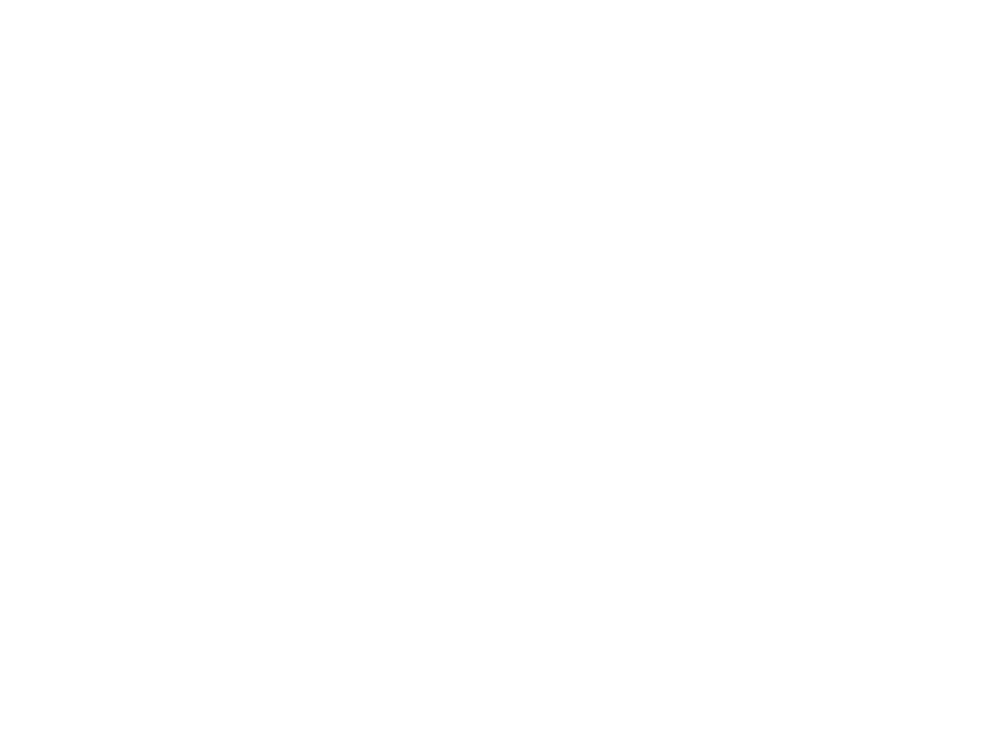

In [24]:
district_crime_df.plot(kind="bar", facecolor='darkblue')

crimes = dallas_crimes_per_zip["Dallas District"]
x_axis = np.arange(len(crimes))
tick_locations = [value for value in x_axis]


plt.xticks(tick_locations,rotation=45, ha='right')
plt.title("Dallas Districts VS Crime Rate 2018", fontsize=16, fontweight='bold')
plt.ylabel("Number of Crimes", fontsize=12)
plt.xlabel("Dallas Districts", fontsize=12)
#plt.rcParams["figure.figsize"] = (,8)
plt.ylim(0, 6000)
plt.show()

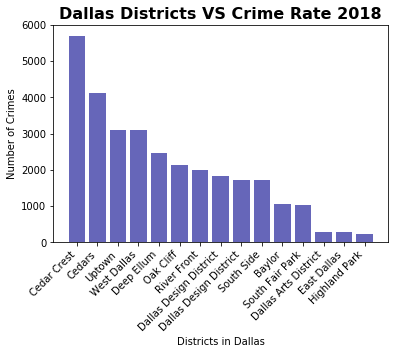

In [25]:
%matplotlib inline
# Bar Graph Test [Is Not Final Visual] [Just want to see what data looks like]
zipcodes = dcp["Dallas District"]
crimes = dcp["Total Reported Crimes 2018"]
x_axis = np.arange(len(crimes))
plt.bar(x_axis, crimes, color="b", align="center",alpha=0.6,facecolor='darkblue' )

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, zipcodes, rotation=45, ha = 'right')
plt.ylim(0, 6000)
plt.title("Dallas Districts VS Crime Rate 2018",fontsize=16, fontweight='bold')
plt.xlabel("Districts in Dallas")
plt.ylabel("Number of Crimes")
plt.show()

In [1]:
dallas_type_crime = dallas_crime_df["Type of Crime"].value_counts()
#dallas_type_crime

NameError: name 'dallas_crime_df' is not defined

In [27]:
txzips = "Resources/txzipslatlong.csv"
zip_lat_long_data = pd.read_csv(txzips, encoding="utf-8")
#zip_lat_long_data.head()

incidents_zip_lat_long_df= pd.merge(dallas_crimes_per_zip,zip_lat_long_data, how='left', left_on=['Zip Code'], right_on=['zip'])
incidents_zip_lat_long_df

,Dallas District,Zip Code,Total Reported Crimes 2018,Crime Rate (%),zip,lat,lng
0,Uptown,75201,3102,10.092400,75201.0,32.78780,-96.79948
1,Dallas Design District,75202,1837,5.976705,75202.0,32.77924,-96.80472
2,Baylor,75207,1045,3.399922,75207.0,32.78676,-96.82139
3,Dallas Arts District,75246,275,0.894716,75246.0,32.79292,-96.77330
4,West Dallas,75204,3091,10.056611,75204.0,32.80205,-96.78882
5,Oak Cliff,75212,2139,6.959266,75212.0,32.78137,-96.87917
6,Dallas Design District,75203,1717,5.586283,75203.0,32.74625,-96.80301
7,River Front,75208,1996,6.494014,75208.0,32.75373,-96.83986
8,East Dallas,75256,275,0.894716,NaN,NaN,NaN
9,South Side,75210,1710,5.563509,75210.0,32.77135,-96.74596


In [28]:
incidents_zip_lat_long_df = incidents_zip_lat_long_df.dropna(how='any')
incidents_zip_lat_long_df.count()
incidents_zip_lat_long_df

,Dallas District,Zip Code,Total Reported Crimes 2018,Crime Rate (%),zip,lat,lng
0,Uptown,75201,3102,10.092400,75201.0,32.78780,-96.79948
1,Dallas Design District,75202,1837,5.976705,75202.0,32.77924,-96.80472
2,Baylor,75207,1045,3.399922,75207.0,32.78676,-96.82139
3,Dallas Arts District,75246,275,0.894716,75246.0,32.79292,-96.77330
4,West Dallas,75204,3091,10.056611,75204.0,32.80205,-96.78882
5,Oak Cliff,75212,2139,6.959266,75212.0,32.78137,-96.87917
6,Dallas Design District,75203,1717,5.586283,75203.0,32.74625,-96.80301
7,River Front,75208,1996,6.494014,75208.0,32.75373,-96.83986
9,South Side,75210,1710,5.563509,75210.0,32.77135,-96.74596
10,Cedars,75215,4131,13.440265,75215.0,32.75075,-96.75806


In [29]:
gmaps.configure(api_key=gkey)

locations = incidents_zip_lat_long_df[["lat", "lng"]].astype(float)
crime_rate = incidents_zip_lat_long_df["Total Reported Crimes 2018"].astype(float)
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=crime_rate, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = .005)

heat_layer.dissipating = False
heat_layer.max_intensity = 100
heat_layer.point_radius = .005
#heat_layer.zoom = -1

fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))